In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web


In [2]:
import yfinance as yf
yf.pdr_override()


In [3]:
TSLA = web.get_data_yahoo('TSLA', start='2020-1-1')

[*********************100%%**********************]  1 of 1 completed


In [4]:
TSLA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


In [5]:
TSLA.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-16,239.490005,240.880005,230.960007,233.589996,233.589996,136816800
2023-11-17,232.000000,237.389999,226.539993,234.300003,234.300003,142532800
2023-11-20,234.039993,237.100006,231.020004,235.600006,235.600006,116320100
2023-11-21,235.039993,243.619995,233.339996,241.199997,241.199997,122288000
2023-11-22,242.039993,244.009995,231.399994,234.210007,234.210007,117950600


In [6]:
TSLA['simple_return'] = (TSLA['Adj Close'] / TSLA['Adj Close'].shift(1)) - 1
print (TSLA['simple_return'])

Date
2020-01-02         NaN
2020-01-03    0.029633
2020-01-06    0.019255
2020-01-07    0.038801
2020-01-08    0.049205
                ...   
2023-11-16   -0.038091
2023-11-17    0.003040
2023-11-20    0.005548
2023-11-21    0.023769
2023-11-22   -0.028980
Name: simple_return, Length: 981, dtype: float64


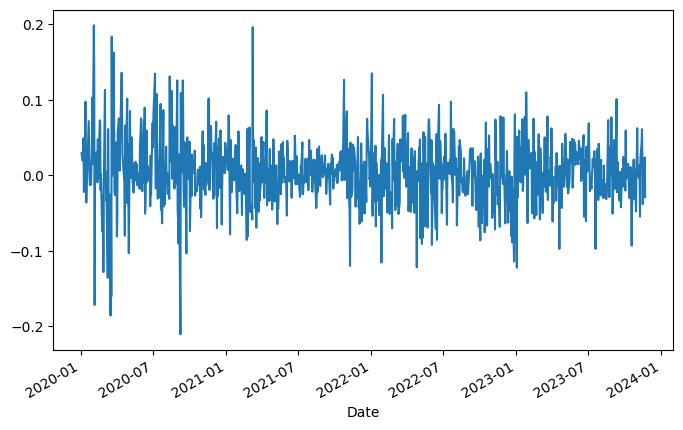

In [7]:
TSLA['simple_return'].plot(figsize=(8, 5))
plt.show()

In [68]:
avg_returns_d = TSLA['simple_return'].mean()
avg_returns_d

0.0030821563463778717

In [12]:
avg_returns_a = TSLA['simple_return'].mean() *250
avg_returns_a

0.7705390865944679

In [13]:
print(str(round(avg_returns_a,5)*100) + '%')

77.054%


In [128]:
#puxar dados do yahoo finanças
tickers = ["TSLA" ,"F", "TM", "GM", "HMC","BYD","BMW.DE","MBG.DE"]

carteira = web.get_data_yahoo(tickers, start="2020-01-01")["Adj Close"]

[*********************100%%**********************]  8 of 8 completed


In [129]:
carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2020-01-02 to 2023-11-23
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BMW.DE  992 non-null    float64
 1   BYD     981 non-null    float64
 2   F       981 non-null    float64
 3   GM      981 non-null    float64
 4   HMC     981 non-null    float64
 5   MBG.DE  992 non-null    float64
 6   TM      981 non-null    float64
 7   TSLA    981 non-null    float64
dtypes: float64(8)
memory usage: 70.9 KB


In [130]:
#primeira linha
carteira.head()

,BMW.DE,BYD,F,GM,HMC,MBG.DE,TM,TSLA
Date,,,,,,,,
2020-01-02,58.847401,29.498901,8.077004,36.477718,26.480251,39.601479,142.240005,28.684000
2020-01-03,58.133816,29.135687,7.896944,35.443306,26.008711,38.884331,140.750000,29.534000
2020-01-06,57.919746,29.184769,7.854073,34.974892,25.934744,38.674343,140.770004,30.102667
2020-01-07,58.847401,28.988440,7.931241,34.301552,26.082680,38.983383,141.509995,31.270666
2020-01-08,58.998051,29.243671,7.931241,33.813618,26.008711,39.201305,141.160004,32.809334


In [131]:
#ultima linha
carteira.tail()

,BMW.DE,BYD,F,GM,HMC,MBG.DE,TM,TSLA
Date,,,,,,,,
2023-11-17,95.199997,58.810001,10.27,28.030001,32.570000,58.599998,193.360001,234.300003
2023-11-20,95.739998,58.830002,10.34,28.520000,31.580000,58.930000,187.679993,235.600006
2023-11-21,93.550003,58.779999,10.19,27.900000,30.770000,58.160000,183.210007,241.199997
2023-11-22,94.239998,59.240002,10.26,28.100000,31.219999,58.279999,184.229996,234.210007
2023-11-23,94.129997,NaN,NaN,NaN,NaN,58.240002,NaN,NaN


In [132]:
#apontando para o primeiro dia registrado
carteira.iloc()

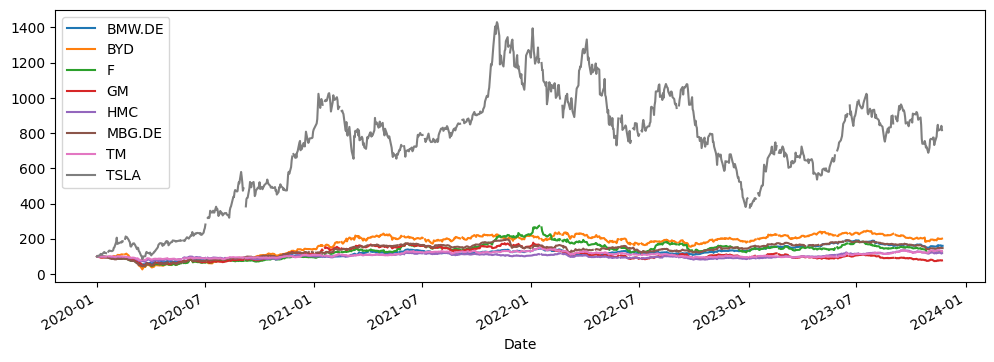

In [133]:
#normalizando para base 100 e plotando o grafico
(carteira / carteira.iloc[0] * 100).plot(figsize = (12, 4));
plt.show()

In [134]:
#criando um portfólio com pesos iguais. Criando um  array, chamado “weights”
weights = np.array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [135]:
#retorno anuais
annual_returns = returns.mean() * 250
annual_returns

BMW.DE    0.133025
BYD       0.396401
F         0.176335
GM        0.017389
HMC       0.074317
MBG.DE    0.163633
TM        0.097134
TSLA      0.745165
dtype: float64

In [136]:
np.dot(annual_returns, weights)

0.22542497206783577

In [137]:
#desenpenho da carteira
pfolio_1 = str(round(np.dot(annual_returns, weights), 4) * 100) + ' %'
print (pfolio_1)

22.54 %
